### Assignment : Lending Club Case Study

Group Members: Puspanjali Sarma & Harjaspreet Singh 

Batch: ML- C43

Institute: Post Graduate Diploma in Machine Learning and AI - IIIT, Bangalore

In [1]:
# Importing all libraries required.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# set it to convert scientific values
pd.options.display.float_format = '{:.2f}'.format 

# Regular expressions for string manipulation
import re

# Ignore warnings due to version problems
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Read CSV file and check it's attributes before proceeding further.
df = pd.read_csv('loan.csv')

In [3]:
# check shape & datatype of loan data
df.shape

(39717, 111)

Observation: The dataset has 39717 rows and 111 variables 

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


In [5]:
df.dtypes

id                              int64
member_id                       int64
loan_amnt                       int64
funded_amnt                     int64
funded_amnt_inv               float64
                               ...   
tax_liens                     float64
tot_hi_cred_lim               float64
total_bal_ex_mort             float64
total_bc_limit                float64
total_il_high_credit_limit    float64
Length: 111, dtype: object

Observation:The dataset has 13 integer, 74 float and  24 categorical variiables.

### Data Cleansing

In [6]:
# Check for duplicate rows in dataset based on id column
print(df.duplicated(subset=None, keep='first').count())
dup=df[df.duplicated(['id'])]
dup

39717


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit


Observation:There are no duplicate rows in loan dataset

In [7]:
# sum it up to check how many rows have all missing values
print('Number of empty Rows:')
print(df.isnull().all(axis=1).sum())

Number of empty Rows:
0


Observation: There are no empty rows in whole dataset.

In [8]:
# sum it up to check how many columns have all missing values
print('Number of empty Columns:')
print(df.isnull().all(axis=0).sum())

Number of empty Columns:
54


Observation: There are 54 columns have all missing values.

In [9]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [10]:
# Columns have all null values
pd.isnull(df).sum()

id                                    0
member_id                             0
loan_amnt                             0
funded_amnt                           0
funded_amnt_inv                       0
term                                  0
int_rate                              0
installment                           0
grade                                 0
sub_grade                             0
emp_title                          2459
emp_length                         1075
home_ownership                        0
annual_inc                            0
verification_status                   0
issue_d                               0
loan_status                           0
pymnt_plan                            0
url                                   0
desc                              12940
purpose                               0
title                                11
zip_code                              0
addr_state                            0
dti                                   0


In [11]:
# Drop columns where all values are null. Below in sequence all columns have null values

In [12]:
df.drop(['mths_since_last_major_derog',
'annual_inc_joint',
'dti_joint',
'verification_status_joint',
'tot_coll_amt',
'tot_cur_bal',
'open_acc_6m',
'open_il_6m',
'open_il_12m',
'open_il_24m',
'mths_since_rcnt_il',
'total_bal_il',
'il_util',
'open_rv_12m',
'open_rv_24m',
'max_bal_bc',
'all_util',
'total_rev_hi_lim',
'inq_fi',
'total_cu_tl',
'inq_last_12m',
'acc_open_past_24mths',
'avg_cur_bal',
'bc_open_to_buy',
'bc_util',
'mo_sin_old_il_acct',
'mo_sin_old_rev_tl_op',
'mo_sin_rcnt_rev_tl_op',
'mo_sin_rcnt_tl',
'mort_acc',
'mths_since_recent_bc',
'mths_since_recent_bc_dlq',
'mths_since_recent_inq',
'mths_since_recent_revol_delinq',
'num_accts_ever_120_pd',
'num_actv_bc_tl',
'num_actv_rev_tl',
'num_bc_sats',
'num_bc_tl',
'num_il_tl',
'num_op_rev_tl',
'num_rev_accts',
'num_rev_tl_bal_gt_0',
'num_sats',
'num_tl_120dpd_2m',
'num_tl_30dpd',
'num_tl_90g_dpd_24m',
'num_tl_op_past_12m',
'pct_tl_nvr_dlq',
'percent_bc_gt_75',
'tot_hi_cred_lim',
'total_bal_ex_mort',
'total_bc_limit',
'total_il_high_credit_limit'
], axis=1, inplace = True)

In [13]:
# Drop columns where all values are null. Below in sequence all columns have null values
#df.drop(df.iloc[:, 53:105], inplace = True, axis = 1) 
df.shape

(39717, 57)

In [14]:
# Drop additional columns we don't need these as these are mostly nulls.
columns_drop_list1 = ["desc","mths_since_last_delinq","mths_since_last_record","next_pymnt_d"]
df.drop(labels = columns_drop_list1, axis =1, inplace=True)

In [15]:
columns_drop_list3 = ["member_id","url","emp_title","zip_code","tax_liens"]
df.drop(labels = columns_drop_list3, axis =1, inplace=True)

In [16]:
## We will also remove those columns which have only 0 or 1  as its values 
df.drop(["collections_12_mths_ex_med","policy_code", "acc_now_delinq", "chargeoff_within_12_mths", "delinq_amnt", ], axis = 1, inplace = True)

In [17]:
pd.isnull(df).sum()

id                            0
loan_amnt                     0
funded_amnt                   0
funded_amnt_inv               0
term                          0
int_rate                      0
installment                   0
grade                         0
sub_grade                     0
emp_length                 1075
home_ownership                0
annual_inc                    0
verification_status           0
issue_d                       0
loan_status                   0
pymnt_plan                    0
purpose                       0
title                        11
addr_state                    0
dti                           0
delinq_2yrs                   0
earliest_cr_line              0
inq_last_6mths                0
open_acc                      0
pub_rec                       0
revol_bal                     0
revol_util                   50
total_acc                     0
initial_list_status           0
out_prncp                     0
out_prncp_inv                 0
total_py

In [18]:
# Format employment length column to have only numbers. It may play important role in analysis further.

df.emp_length.fillna('0',inplace=True)
df['emp_length']=df.emp_length.str.extract('(\d+)')
df.head(2)

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,purpose,title,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,application_type,pub_rec_bankruptcies
0,1077501,5000,5000,4975.00,36 months,10.65%,162.87,B,B2,10,RENT,24000.00,Verified,Dec-11,Fully Paid,n,credit_card,Computer,AZ,27.65,0,Jan-85,1,3,0,13648,83.70%,9,f,0.00,0.00,5863.16,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,May-16,INDIVIDUAL,0.00
1,1077430,2500,2500,2500.00,60 months,15.27%,59.83,C,C4,1,RENT,30000.00,Source Verified,Dec-11,Charged Off,n,car,bike,GA,1.00,0,Apr-99,5,3,0,1687,9.40%,4,f,0.00,0.00,1008.71,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,Sep-13,INDIVIDUAL,0.00


In [19]:
# pub_rec_bankruptcies can be cleaned for further analysis.
print("Before cleaning:")
print(df.pub_rec_bankruptcies.isnull().sum())
print("After cleaning:")
df.pub_rec_bankruptcies.fillna('Not Known',inplace=True)
print(df.pub_rec_bankruptcies.isnull().sum())

Before cleaning:
697
After cleaning:
0


In [20]:
# Remove % symbol from intrest rate column so that it can be used in calculations
df['int_rate'] = df['int_rate'].str.rstrip('%')

# Remove % symbol from revol_util column so that it can be used in calculations
df['revol_util'] = df['revol_util'].str.rstrip('%')

In [21]:
# Convert amount columns into numeric data to find some correlation among important ones.
cols1 = ['loan_amnt','funded_amnt','int_rate','funded_amnt_inv','installment','annual_inc','dti','emp_length','total_pymnt']
df[cols1] = df[cols1].apply(pd.to_numeric)

In [22]:
# Take a look on important variable loan status in total loans issued
(df.loan_status.value_counts()*100)/len(df)

Fully Paid    82.96
Charged Off   14.17
Current        2.87
Name: loan_status, dtype: float64

Observations
1. 82.96 percent loans were fully paid.
2. Close to 14% loans were charged off

In [23]:
# Check purpose of loan in total loans issued
(df.purpose.value_counts()*100)/len(df)

debt_consolidation   46.93
credit_card          12.92
other                10.05
home_improvement      7.49
major_purchase        5.51
small_business        4.60
car                   3.90
wedding               2.38
medical               1.74
moving                1.47
vacation              0.96
house                 0.96
educational           0.82
renewable_energy      0.26
Name: purpose, dtype: float64

Observations
1.  Most of the loans taken for debt consolidation(47%) and Credit card bill payment
2.  Other is also one of the main area where loans were taken.

In [24]:
pd.isnull(df).sum()

id                          0
loan_amnt                   0
funded_amnt                 0
funded_amnt_inv             0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
emp_length                  0
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
pymnt_plan                  0
purpose                     0
title                      11
addr_state                  0
dti                         0
delinq_2yrs                 0
earliest_cr_line            0
inq_last_6mths              0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                 50
total_acc                   0
initial_list_status         0
out_prncp                   0
out_prncp_inv               0
total_pymnt                 0
total_pymnt_inv             0
total_rec_

# Exploratory Data Analysis

### Extract YEAR and MONTH from issue_d

In [25]:
# Create month and year columns separately

df.issue_d = pd.to_datetime(df.issue_d, format='%b-%y')
df['year']=df['issue_d'].dt.year
df['month']=df['issue_d'].dt.month

df.head(1)

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,purpose,title,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,application_type,pub_rec_bankruptcies,year,month
0,1077501,5000,5000,4975.00,36 months,10.65,162.87,B,B2,10,RENT,24000.00,Verified,2011-12-01,Fully Paid,n,credit_card,Computer,AZ,27.65,0,Jan-85,1,3,0,13648,83.70,9,f,0.00,0.00,5863.16,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,May-16,INDIVIDUAL,0.00,2011,12


### Univariate Analysis - Numerical Variables

In [26]:
# Check and plot data distribution
df['loan_amnt'].describe()

count   39717.00
mean    11219.44
std      7456.67
min       500.00
25%      5500.00
50%     10000.00
75%     15000.00
max     35000.00
Name: loan_amnt, dtype: float64

<AxesSubplot:xlabel='loan_amnt'>

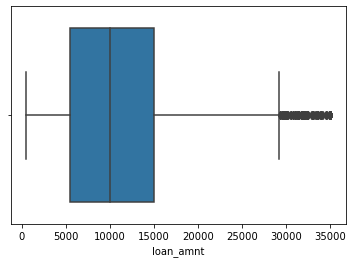

In [27]:
sns.boxplot(df.loan_amnt)

In [28]:
# Check and plot data distribution
df.total_pymnt.describe()

count   39717.00
mean    12153.60
std      9042.04
min         0.00
25%      5576.93
50%      9899.64
75%     16534.43
max     58563.68
Name: total_pymnt, dtype: float64

<AxesSubplot:xlabel='total_pymnt'>

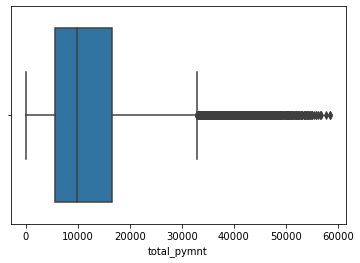

In [29]:
sns.boxplot(df.total_pymnt)

In [30]:
# Check and treat Outliers

#print('Before Removal of Outliers :\n')
#print(df['annual_inc'].describe())

# Data cleaning
# Remove Outliers quantile .99 from Annual Income
#df = df[df["annual_inc"] < df["annual_inc"].quantile(0.99)]

#print('After Removal of Outliers :')
#print(df["annual_inc"].describe())

<AxesSubplot:xlabel='annual_inc'>

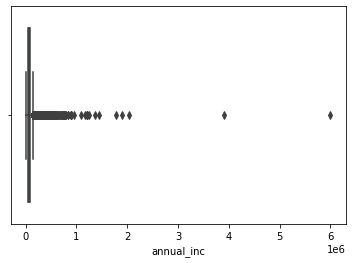

In [31]:
sns.boxplot(df.annual_inc)

In [32]:
# Check and plot data distribution
df['int_rate'].describe()

count   39717.00
mean       12.02
std         3.72
min         5.42
25%         9.25
50%        11.86
75%        14.59
max        24.59
Name: int_rate, dtype: float64

<AxesSubplot:xlabel='int_rate'>

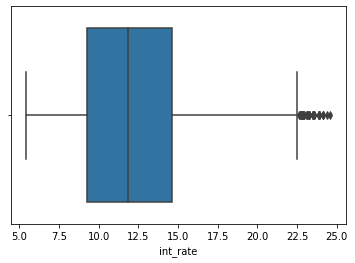

In [33]:
sns.boxplot(df.int_rate)

Observation: 
1. Average intrest rate is 12 %
2. After 75% percentile interest rate increased to 25% from 15%.

In [34]:
## We will also remove those columns which have redundant categorical values
df.drop(["pymnt_plan", "title",  "initial_list_status","application_type"], axis = 1, inplace = True)

(array([1, 2, 3, 4, 5, 6]),
 [Text(1, 0, 'dti'),
  Text(2, 0, 'delinq_2yrs'),
  Text(3, 0, 'inq_last_6mths'),
  Text(4, 0, 'open_acc'),
  Text(5, 0, 'pub_rec'),
  Text(6, 0, 'total_acc')])

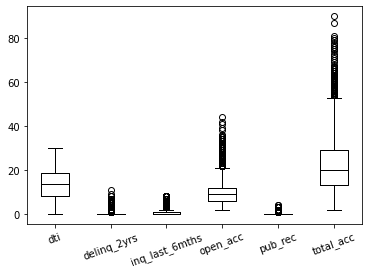

In [35]:
import matplotlib.pyplot as plt
%matplotlib inline

df.boxplot(column=[  'dti', 'delinq_2yrs', 
       'inq_last_6mths', 'open_acc', 'pub_rec', 'total_acc'], grid=False, color='black')

plt.xticks(rotation=20)

<AxesSubplot:>

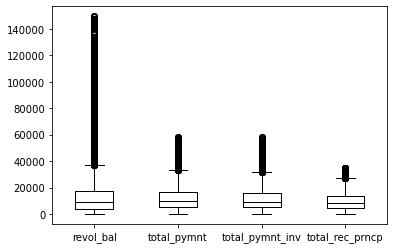

In [36]:
df.boxplot(column=[ 'revol_bal', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp'], grid=False, color='black')

<AxesSubplot:>

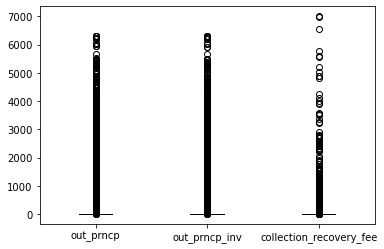

In [37]:
df.boxplot(column=['out_prncp', 'out_prncp_inv', 'collection_recovery_fee'
        ], grid=False, color='black') 

<AxesSubplot:>

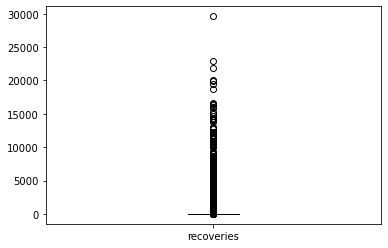

In [38]:
df.boxplot(column=[  'recoveries' ], grid=False, color='black')

<AxesSubplot:>

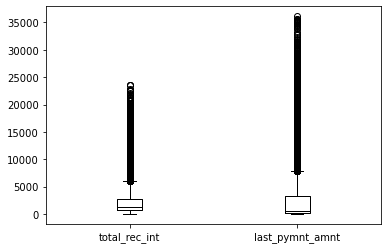

In [39]:
df.boxplot(column=[ 'total_rec_int',      
       'last_pymnt_amnt'], grid=False, color='black') 

<AxesSubplot:>

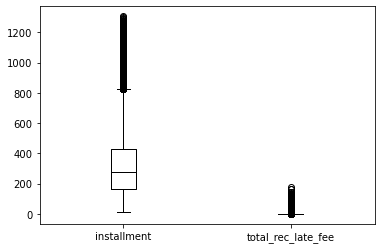

In [40]:
df.boxplot(column=['installment', 'total_rec_late_fee'], grid=False, color='black')

In [41]:
# Drop additional columns which are not needed further in analysis.
##columns_drop_list4 = ["application_type","policy_code","initial_list_status","installment","pymnt_plan"]
##df.drop(labels = columns_drop_list4, axis =1, inplace=True)
print(df.shape)
df.isnull().sum()

(39717, 41)


id                          0
loan_amnt                   0
funded_amnt                 0
funded_amnt_inv             0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
emp_length                  0
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
addr_state                  0
dti                         0
delinq_2yrs                 0
earliest_cr_line            0
inq_last_6mths              0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                 50
total_acc                   0
out_prncp                   0
out_prncp_inv               0
total_pymnt                 0
total_pymnt_inv             0
total_rec_prncp             0
total_rec_int               0
total_rec_late_fee          0
recoveries

### Binning of  - Numerical  Variables

In [42]:
# categorise loan amounts into buckets which will help in analysis further in bivariate analysis.
df['loan_amnt_cats'] = pd.cut(df['loan_amnt'], [0, 7000, 14000, 21000, 28000, 35000], labels=['0-7000', '7000-14000', '14000-21000', '21000-28000', '28000 +'])

# categorise annual incomes into buckets which will help in analysis further in bivariate analysis.
df['annual_inc_cats'] = pd.cut(df['annual_inc'], [0, 20000, 40000, 60000, 80000,1000000], labels=['0-20000', '20000-40000', '40000-60000', '60000-80000', '80000 +'])

# categorise intrest rates into buckets which will help in analysis further in bivariate analysis.
df['int_rate_cats'] = pd.cut(df['int_rate'], [0, 10, 12.5, 16, 20], labels=['0-10', '10-13', '12.5-16', '16 +'])

# categorise dti into buckets for bivariate analysis.
df['dti_cats'] = pd.cut(df['dti'], [0, 5, 10, 15, 20, 25], labels=['0-5', '05-10', '10-15', '15-20', '25+'])


In [43]:
# Lets take a look on shape and data
print(df.shape)
df.head(1)
# Observation is we have created extra 5 columns after dropping many.

(39717, 45)


,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies,year,month,loan_amnt_cats,annual_inc_cats,int_rate_cats,dti_cats
0,1077501,5000,5000,4975.00,36 months,10.65,162.87,B,B2,10,RENT,24000.00,Verified,2011-12-01,Fully Paid,credit_card,AZ,27.65,0,Jan-85,1,3,0,13648,83.70,9,0.00,0.00,5863.16,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,May-16,0.00,2011,12,0-7000,20000-40000,10-13,NaN


In [44]:
df.dtypes

id                                  int64
loan_amnt                           int64
funded_amnt                         int64
funded_amnt_inv                   float64
term                               object
int_rate                          float64
installment                       float64
grade                              object
sub_grade                          object
emp_length                          int64
home_ownership                     object
annual_inc                        float64
verification_status                object
issue_d                    datetime64[ns]
loan_status                        object
purpose                            object
addr_state                         object
dti                               float64
delinq_2yrs                         int64
earliest_cr_line                   object
inq_last_6mths                      int64
open_acc                            int64
pub_rec                             int64
revol_bal                         

### Univariate Analysis - Numerical Variables

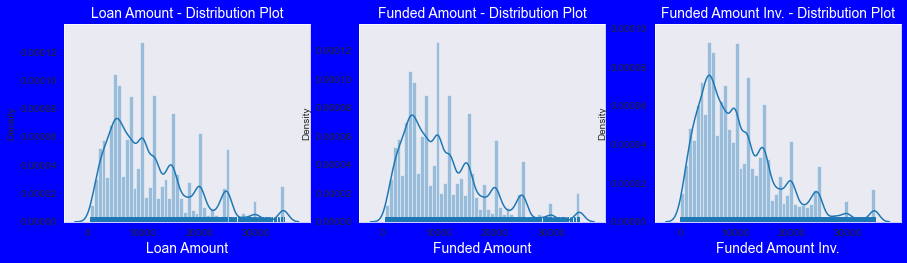

In [45]:
# Lets see distribution of three loan amount fields using distribution plot.
plt.figure(figsize=(15,8),facecolor='b')
sns.set_style("dark")
# subplot 1
plt.subplot(2, 3, 1)
ax = sns.distplot(df['loan_amnt'],rug = True)
ax.set_title('Loan Amount - Distribution Plot',fontsize=14,color='w')
ax.set_xlabel('Loan Amount',fontsize=14,color='w')
# subplot 2
plt.subplot(2, 3, 2)
ax = sns.distplot(df['funded_amnt'],rug = True)
ax.set_title('Funded Amount - Distribution Plot',fontsize=14,color='w')
ax.set_xlabel('Funded Amount',fontsize=14,color='w')
# subplot 2
plt.subplot(2, 3, 3)
ax = sns.distplot(df['funded_amnt_inv'],rug = True)
ax.set_title('Funded Amount Inv. - Distribution Plot',fontsize=14,color='w')
ax.set_xlabel('Funded Amount Inv.',fontsize=14,color='w')
plt.show()

Observation: 
1. Distribution of amounts for all three looks very much similar.
2. We will work with only loan amount column for rest of our analysis.

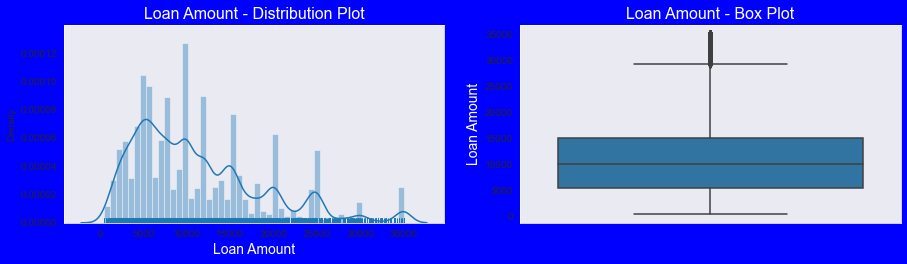

In [46]:
# Univariate Analysis on Loan amount-Quantitative Variables
plt.figure(figsize=(15,8),facecolor='b')
sns.set_style("dark")
# subplot 1
plt.subplot(2, 2, 1)
ax = sns.distplot(df['loan_amnt'],rug = True)
ax.set_title('Loan Amount - Distribution Plot',fontsize=16,color='w')
ax.set_xlabel('Loan Amount',fontsize=14,color='w')
# subplot 2
plt.subplot(2, 2, 2)
ax = sns.boxplot(y=df['loan_amnt'])
ax.set_title('Loan Amount - Box Plot',fontsize=16,color='w')
ax.set_ylabel('Loan Amount',fontsize=14,color='w')
plt.show()

Observations : Most of the Loan amounts are in range of 5000 - 15000

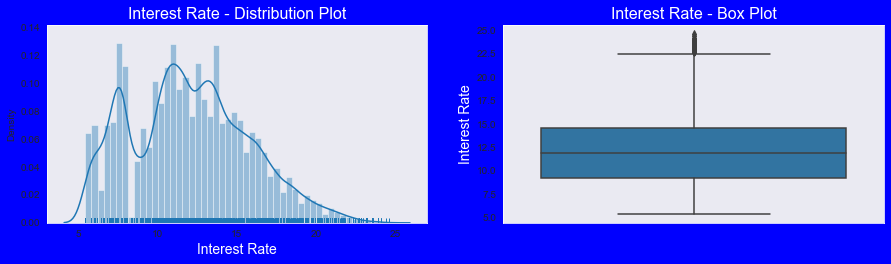

In [47]:
# Univariate Analysis on Intrest Rate-Quantitative Variables

plt.figure(figsize=(15,8),facecolor='b')
sns.set_style("dark")
# subplot 1
plt.subplot(2, 2, 1)
ax = sns.distplot(df['int_rate'],rug = True)
ax.set_title('Interest Rate - Distribution Plot',fontsize=16,color='w')
ax.set_xlabel('Interest Rate',fontsize=14,color='w')
# subplot 2
plt.subplot(2, 2, 2)
ax = sns.boxplot(y=df['int_rate'])
ax.set_title('Interest Rate - Box Plot',fontsize=16,color='w')
ax.set_ylabel('Interest Rate',fontsize=14,color='w')
plt.show()

Observations :Most of the Interest Rates on loans are in range of 10% - 15%

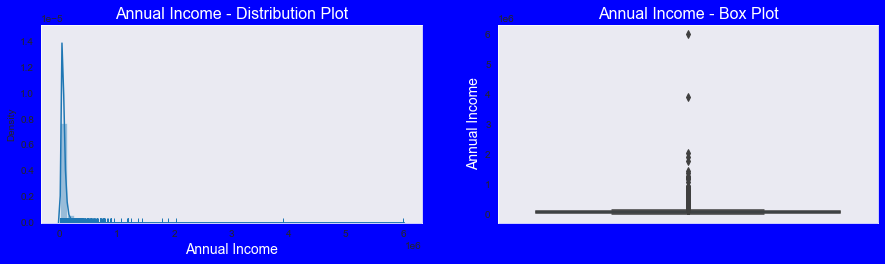

In [48]:
# Univariate Analysis on Annual Income - Quantitative Variables

plt.figure(figsize=(15,8),facecolor='b')
sns.set_style("dark")
# subplot 1
plt.subplot(2, 2, 1)
ax = sns.distplot(df['annual_inc'],rug = True)
ax.set_title('Annual Income - Distribution Plot',fontsize=16,color='w')
ax.set_xlabel('Annual Income',fontsize=14,color='w')
# subplot 2
plt.subplot(2, 2, 2)
plt.title('Annual Income - Box Plot')
ax = sns.boxplot(y=df['annual_inc'])
ax.set_title('Annual Income - Box Plot',fontsize=16,color='w')
ax.set_ylabel('Annual Income',fontsize=14,color='w')
plt.show()

Observations: Most of the borrower's Annual incomes are in range of 40000- 80000

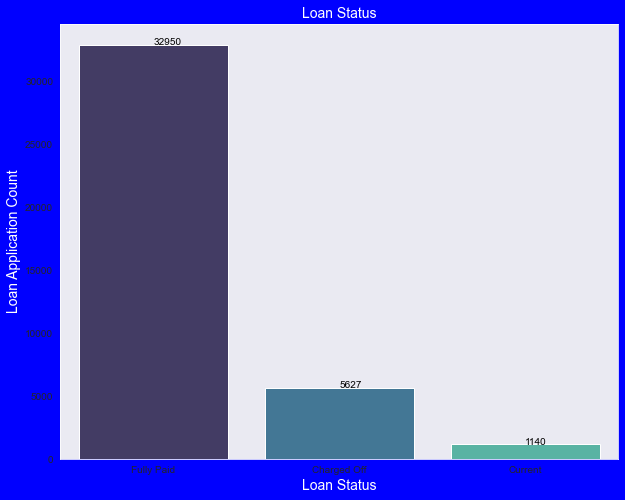

In [49]:
# Univariate Analysis - Unordered Categorical Variables - Loan Status
plt.figure(figsize=(10,8),facecolor='b')
sns.set_style("dark")
ax = sns.countplot(x="loan_status",data=df,palette='mako')
ax.set_title('Loan Status',fontsize=14,color='w')
ax.set_xlabel('Loan Status',fontsize=14,color = 'w')
ax.set_ylabel('Loan Application Count',fontsize=14,color = 'w')            
# To show count of values above bars
s=df['loan_status'].value_counts()
for i, v in s.reset_index().iterrows():
    ax.text(i, v.loan_status + 0.3 , v.loan_status, color='k')

Observations :Appox. 14% loans were charged off out of total loan issued.

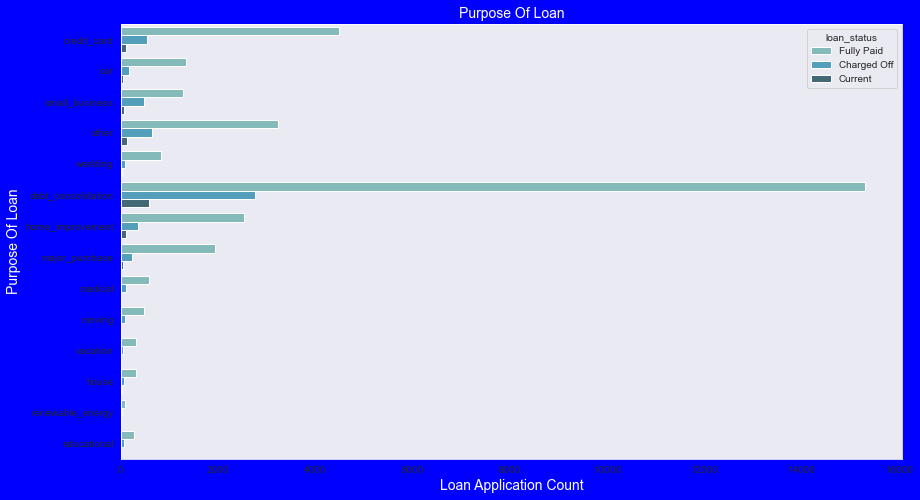

In [50]:
# Univariate Analysis - Unordered Categorical Variables - Purpose Of Loan

plt.figure(figsize=(14,8),facecolor='b')
sns.set_style("dark")
ax = sns.countplot(y="purpose",data=df,hue='loan_status',palette='GnBu_d')
ax.set_title('Purpose Of Loan',fontsize=14,color='w')
ax.set_ylabel('Purpose Of Loan',fontsize=14,color = 'w')
ax.set_xlabel('Loan Application Count',fontsize=14,color = 'w')      
plt.show()

Observations: Most of the loans were taken for the purpose of debt consolidation & paying credit card bill. And number of chraged off count also high too for these loans.

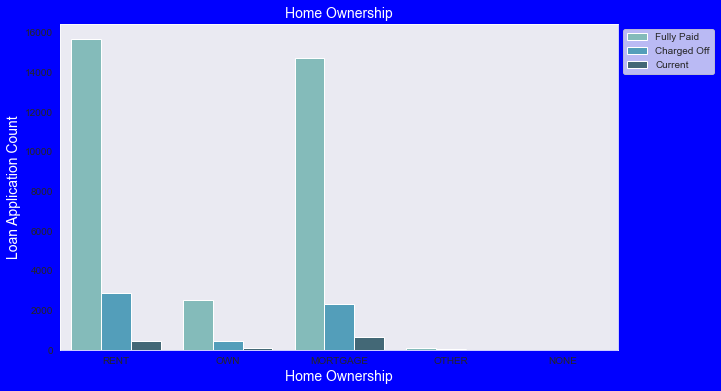

In [51]:
# Univariate Analysis - Unordered Categorical Variables - Home Ownership

plt.figure(figsize=(10,6),facecolor='b')
ax = sns.countplot(x="home_ownership",data=df,hue='loan_status',palette='GnBu_d')
ax.legend(bbox_to_anchor=(1, 1))
ax.set_title('Home Ownership',fontsize=14,color='w')
ax.set_xlabel('Home Ownership',fontsize=14,color = 'w')
ax.set_ylabel('Loan Application Count',fontsize=14,color = 'w')      
plt.show()

Observations :Most of them living in rented home or mortgazed their home. And number of applicants is high from these categories so charged off is high too.

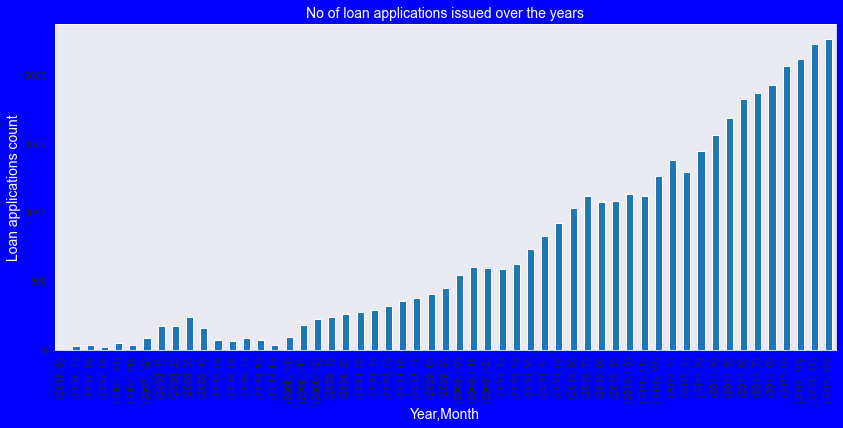

In [52]:
# Let us look into number of loans which were approved every year/month and to check pattern of loan issuing over the years.
plt.figure(figsize=(14,6),facecolor='b')
df.groupby(['year','month']).id.count().plot(kind='bar')
plt.ylabel('Loan applications count',fontsize=14,color='w')
plt.xlabel('Year,Month',fontsize=14,color = 'w')      
plt.title("No of loan applications issued over the years",fontsize=14,color='w')
plt.show()

Observation: Count of loan application is increasing every year which is adding more to number of charged off applications.
It is also seen that number of loans issued in 2008( May-October) got dipped, may be due to Recession.

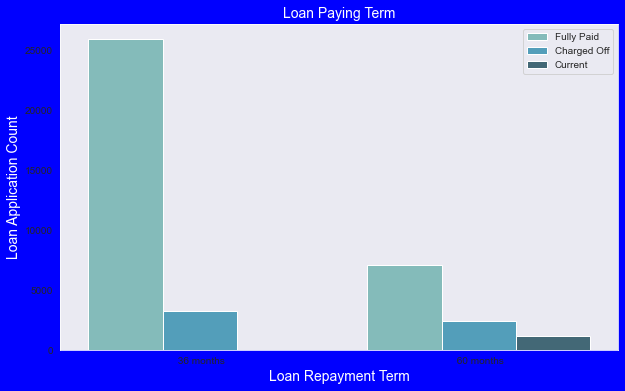

In [53]:
# Univariate Analysis - Ordered Categorical Variables- Loan Paying Term

plt.figure(figsize=(10,6),facecolor='b')
ax = sns.countplot(x="term",data=df,hue='loan_status',palette='GnBu_d')
ax.set_title('Loan Paying Term',fontsize=14,color='w')
ax.set_xlabel('Loan Repayment Term',fontsize=14,color = 'w')
ax.set_ylabel('Loan Application Count',fontsize=14,color = 'w')      
ax.legend(bbox_to_anchor=(1, 1))
plt.show()

Observation: Borrowers who had taken loan to repay in 60 months had more % of number of applicants getting charged off as compared to applicants who had taken loan for 36 months.

### Bivariate Analysis

In [54]:
# Bivariate Analysis on annual income against Chargedoff_Proportion -

inc_range_vs_loan = df.groupby(['annual_inc_cats', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
inc_range_vs_loan['Total'] = inc_range_vs_loan['Charged Off'] + inc_range_vs_loan['Current'] + inc_range_vs_loan['Fully Paid'] 
inc_range_vs_loan['Chargedoff_Proportion'] = inc_range_vs_loan['Charged Off'] / inc_range_vs_loan['Total']
inc_range_vs_loan.sort_values('Chargedoff_Proportion', ascending=False)

loan_status,annual_inc_cats,Charged Off,Current,Fully Paid,Total,Chargedoff_Proportion
0,0-20000,237,9,943,1189,0.20
1,20000-40000,1514,170,7004,8688,0.17
2,40000-60000,1729,345,9534,11608,0.15
3,60000-80000,1024,240,6597,7861,0.13
4,80000 +,1122,376,8859,10357,0.11


Observations:
1. Income range 80000+  has less chances of charged off.
2. Income range 0-20000 has high chances of charged off.
3. Notice that with increase in annual income charged off proportion got decreased. 

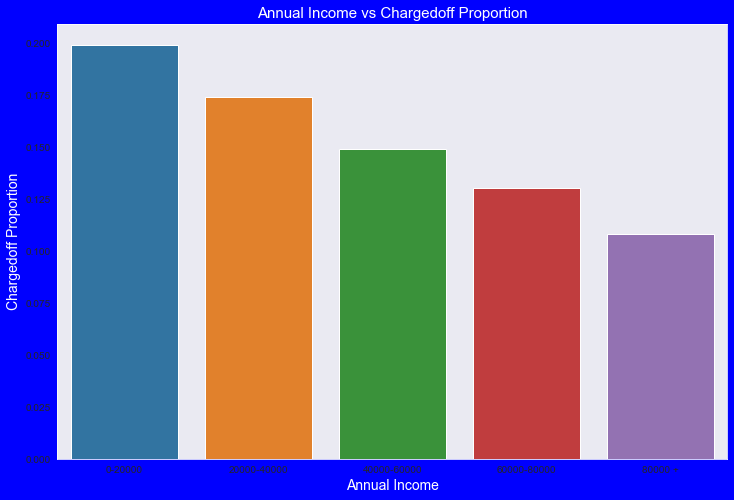

In [55]:
# Lets draw bar plots on data calculated above. Try to visualize the pattern to understand the data better.

fig, ax1 = plt.subplots(figsize=(12, 8),facecolor='b')
ax1.set_title('Annual Income vs Chargedoff Proportion',fontsize=15,color = 'w')
ax1=sns.barplot(x='annual_inc_cats', y='Chargedoff_Proportion', data=inc_range_vs_loan)
ax1.set_ylabel('Chargedoff Proportion',fontsize=14,color = 'w')
ax1.set_xlabel('Annual Income',fontsize=14,color='w')
plt.show()

Observations:
1. Income range 80000+  has less chances of charged off.
2. Income range 0-20000 has high chances of charged off.
3. Notice that with increase in annual income charged off proportion got decreased. 

In [56]:
# Bivariate Analysis on purpose of Loan against Chargedoff_Proportion.

purpose_vs_loan = df.groupby(['purpose', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
purpose_vs_loan['Total'] = purpose_vs_loan['Charged Off'] + purpose_vs_loan['Current'] + purpose_vs_loan['Fully Paid'] 
purpose_vs_loan['Chargedoff_Proportion'] = purpose_vs_loan['Charged Off'] / purpose_vs_loan['Total']
purpose_vs_loan.sort_values('Chargedoff_Proportion', ascending=False)

loan_status,purpose,Charged Off,Current,Fully Paid,Total,Chargedoff_Proportion
11,small_business,475.00,74.00,1279.00,1828.00,0.26
10,renewable_energy,19.00,1.00,83.00,103.00,0.18
3,educational,56.00,0.00,269.00,325.00,0.17
9,other,633.00,128.00,3232.00,3993.00,0.16
8,moving,92.00,7.00,484.00,583.00,0.16
5,house,59.00,14.00,308.00,381.00,0.15
7,medical,106.00,12.00,575.00,693.00,0.15
2,debt_consolidation,2767.00,586.00,15288.00,18641.00,0.15
12,vacation,53.00,6.00,322.00,381.00,0.14
4,home_improvement,347.00,101.00,2528.00,2976.00,0.12


Observations:
1. small Business applicants have high chnaces of getting charged off.
2. renewable_energy where chanrged off proportion is better as compare to other categories.

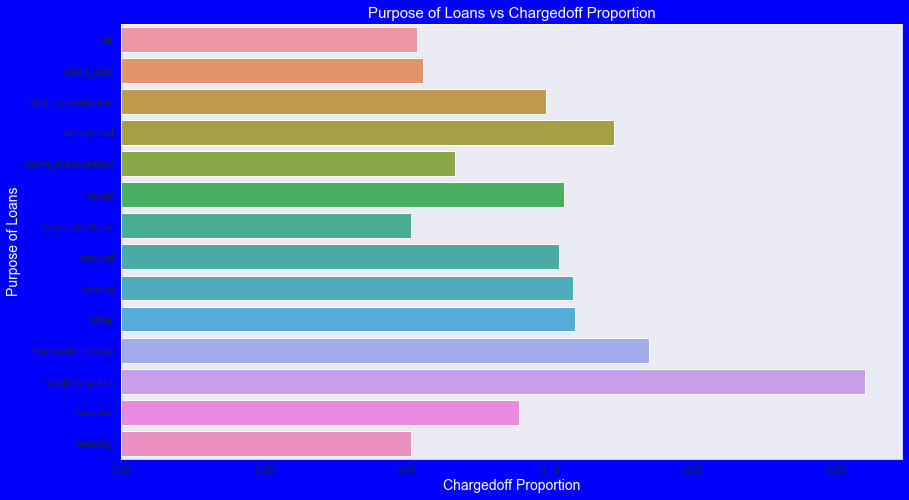

In [57]:
# Lets draw bar plots on data calculated above. Try to visualize the pattern to understand the data better.
# pairs of continuous variables.
fig, ax1 = plt.subplots(figsize=(14, 8),facecolor='b')
ax1.set_title('Purpose of Loans vs Chargedoff Proportion',fontsize=15,color = 'w')
ax1=sns.barplot(y='purpose', x='Chargedoff_Proportion', data=purpose_vs_loan)
ax1.set_ylabel('Purpose of Loans',fontsize=14,color='w')
ax1.set_xlabel('Chargedoff Proportion',fontsize=14,color = 'w')
plt.show()

Observations:
1. small Business applicants have high chances of getting charged off.
2. renewable_energy where chanrged off proportion is better as compare to other categories.

In [58]:
# Bivariate Analysis on grade against Chargedoff_Proportion

grade_vs_loan = df.groupby(['grade', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
grade_vs_loan['Total'] = grade_vs_loan['Charged Off'] + grade_vs_loan['Current'] + grade_vs_loan['Fully Paid'] 
grade_vs_loan['Chargedoff_Proportion'] = grade_vs_loan['Charged Off'] / grade_vs_loan['Total']
grade_vs_loan.sort_values('Chargedoff_Proportion', ascending=False)

loan_status,grade,Charged Off,Current,Fully Paid,Total,Chargedoff_Proportion
6,G,101,17,198,316,0.32
5,F,319,73,657,1049,0.30
4,E,715,179,1948,2842,0.25
3,D,1118,222,3967,5307,0.21
2,C,1347,264,6487,8098,0.17
1,B,1425,345,10250,12020,0.12
0,A,602,40,9443,10085,0.06


Observations:
1. Grade "A" has very less chances of charged off.
2. Grade "F" and "G" have very high chances of charged off.
3. Chances of charged off is increasing with grade moving from "A" towards "G"

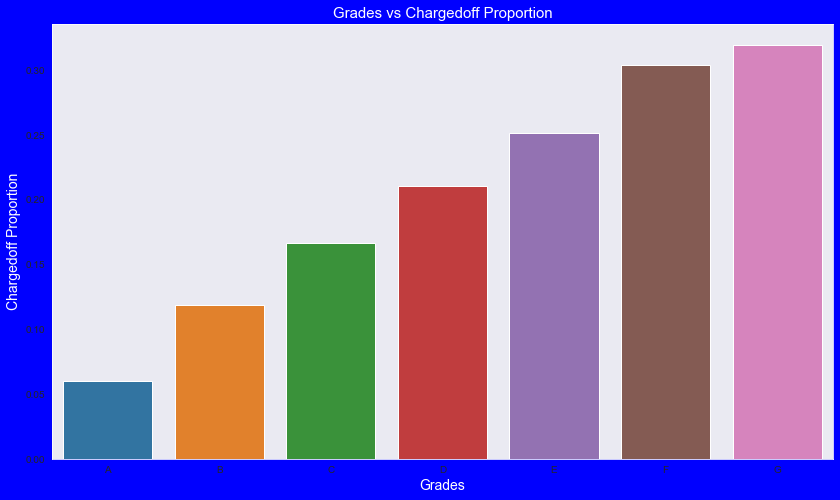

In [59]:
# Lets draw bar plots on data calculated above. Try to visualize the pattern to understand the data better.

fig, ax1 = plt.subplots(figsize=(14, 8),facecolor='b')
ax1.set_title('Grades vs Chargedoff Proportion',fontsize=15,color='w')
ax1=sns.barplot(x='grade', y='Chargedoff_Proportion', data=grade_vs_loan)
ax1.set_xlabel('Grades',fontsize=14,color='w')
ax1.set_ylabel('Chargedoff Proportion',fontsize=14,color ='w')
plt.show()

Observations:
1. Grade "A" has very less chances of charged off.
2. Grade "F" and "G" have very high chances of charged off.
3. Chances of charged of is increasing with grade moving from "A" towards "G"

In [60]:
# Understanding grades better
# Bivariate Analysis on sub grade against Chargedoff_Proportion

grade_vs_loan = df.groupby(['sub_grade', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
grade_vs_loan['Total'] = grade_vs_loan['Charged Off'] + grade_vs_loan['Current'] + grade_vs_loan['Fully Paid'] 
grade_vs_loan['Chargedoff_Proportion'] = grade_vs_loan['Charged Off'] / grade_vs_loan['Total']
grade_vs_loan.sort_values('Chargedoff_Proportion', ascending=False)

loan_status,sub_grade,Charged Off,Current,Fully Paid,Total,Chargedoff_Proportion
29,F5,54.00,5.00,59.00,118.00,0.46
32,G3,19.00,3.00,26.00,48.00,0.40
31,G2,28.00,1.00,49.00,78.00,0.36
34,G5,10.00,1.00,19.00,30.00,0.33
28,F4,53.00,17.00,98.00,168.00,0.32
30,G1,31.00,10.00,63.00,104.00,0.30
26,F2,70.00,16.00,163.00,249.00,0.28
23,E4,126.00,30.00,298.00,454.00,0.28
25,F1,91.00,24.00,214.00,329.00,0.28
27,F3,51.00,11.00,123.00,185.00,0.28


Observations:
1. sub Grades of "A" has very less chances of charged off.
2. sub Grades of "F" and "G" have very high chances of charged off.
3. proportion of charged off is increasing with sub grades moving from sub grades of "A" towards sub grades of "G"

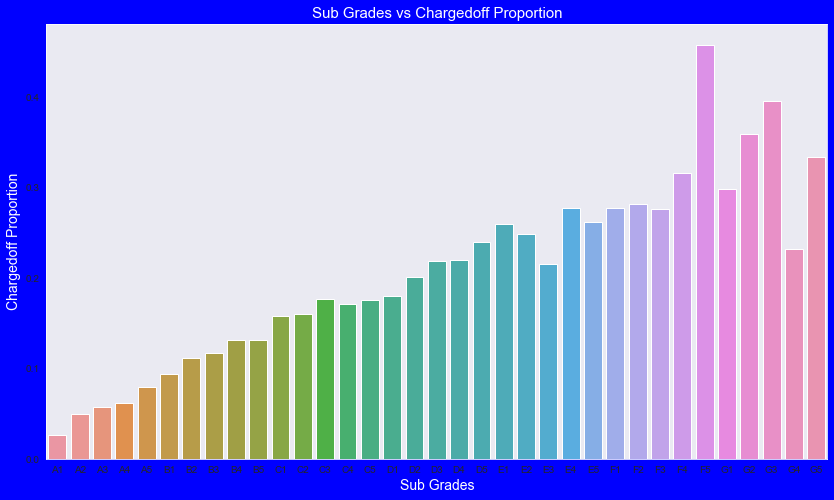

In [61]:
# Lets draw bar plots on data calculated above. Try to visualize the pattern to understand the data better.

fig, ax1 = plt.subplots(figsize=(14, 8),facecolor='b')
ax1.set_title('Sub Grades vs Chargedoff Proportion',fontsize=15,color='w')
ax1=sns.barplot(x='sub_grade', y='Chargedoff_Proportion', data=grade_vs_loan)
ax1.set_xlabel('Sub Grades',fontsize=14,color='w')
ax1.set_ylabel('Chargedoff Proportion',fontsize=14,color = 'w')
plt.show()

Observations:
1. sub Grades of "A" has very less chances of charged off.
2. sub Grades of "F" and "G" have very high chances of charged off.
3. proportion of charged off is increasing with sub grades moving from sub grades of "A" towards sub grades of "G"

In [62]:
# Bivariate Analysis on interest rate against Chargedoff_Proportion

interest_vs_loan = df.groupby(['int_rate_cats', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
interest_vs_loan['Total'] = interest_vs_loan['Charged Off'] + interest_vs_loan['Current'] + interest_vs_loan['Fully Paid'] 
interest_vs_loan['Chargedoff_Proportion'] = interest_vs_loan['Charged Off'] / interest_vs_loan['Total']
interest_vs_loan.sort_values('Chargedoff_Proportion', ascending=False)

loan_status,int_rate_cats,Charged Off,Current,Fully Paid,Total,Chargedoff_Proportion
3,16 +,1266,359,3372,4997,0.25
2,12.5-16,2003,332,9470,11805,0.17
1,10-13,1232,270,8148,9650,0.13
0,0-10,830,77,11486,12393,0.07


Observations:
1. The interest rate less than 10% has very less chances of charged off. Intrest rates are starting from minimin 5 %.
2. The interest rate more than 16% has good chnaces of charged off as compared to other category intrest rates.
3. Charged off proportion is increasing with higher intrest rates.

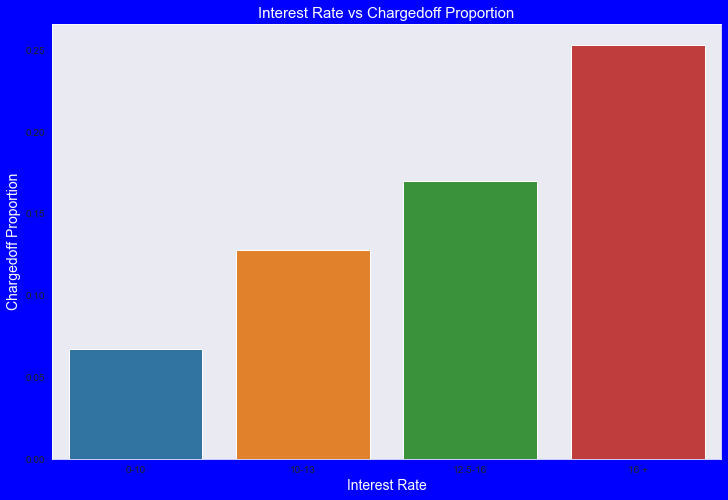

In [63]:
# Lets draw some bar plots on data calculated above. Try to visualize the pattern to understand the data better.

fig, ax1 = plt.subplots(figsize=(12, 8),facecolor='b')
ax1.set_title('Interest Rate vs Chargedoff Proportion',fontsize=15,color='w')
ax1=sns.barplot(x='int_rate_cats', y='Chargedoff_Proportion', data=interest_vs_loan)
ax1.set_xlabel('Interest Rate',fontsize=14,color='w')
ax1.set_ylabel('Chargedoff Proportion',fontsize=14,color = 'w')
plt.show()

Observations:
1. The interest rate less than 10% has very less chances of charged off. Intrest rates are starting from minimin 5 %.
2. interest rate more than 16% has good chnaces of charged off as compared to other category intrest rates.
3. Charged off proportion is increasing with higher intrest rates.

In [64]:
# Bivariate Analysis on employment length against Chargedoff_Proportion

emplen_vs_loan = df.groupby(['emp_length', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
emplen_vs_loan['Total'] = emplen_vs_loan['Charged Off'] + emplen_vs_loan['Current'] + emplen_vs_loan['Fully Paid'] 
emplen_vs_loan['Chargedoff_Proportion'] = emplen_vs_loan['Charged Off'] / emplen_vs_loan['Total']
emplen_vs_loan.sort_values('Chargedoff_Proportion', ascending=False)

loan_status,emp_length,Charged Off,Current,Fully Paid,Total,Chargedoff_Proportion
0,0,228,42,805,1075,0.21
10,10,1331,391,7157,8879,0.15
7,7,263,62,1448,1773,0.15
1,1,1095,146,6582,7823,0.14
5,5,458,88,2736,3282,0.14
6,6,307,61,1861,2229,0.14
8,8,203,44,1232,1479,0.14
3,3,555,83,3457,4095,0.14
4,4,462,94,2880,3436,0.13
2,2,567,97,3724,4388,0.13


Observations:
1. Those who are not working or have less than 1 year of work experience have high chances of getting charged off.
2. It makes sense as with less or no experience they don't have source of income to repay loan.
3. Rest of the applicants have more or less same chnaces of getting charged off.

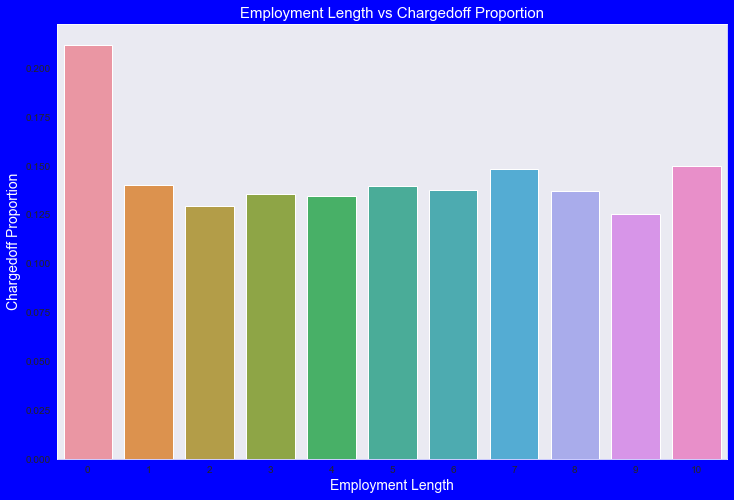

In [65]:
# Lets draw bar plots on data calculated above. Try to visualize the pattern to understand the data better.

fig, ax1 = plt.subplots(figsize=(12, 8),facecolor='b')
ax1.set_title('Employment Length vs Chargedoff Proportion',fontsize=15,color='w')
ax1=sns.barplot(x='emp_length', y='Chargedoff_Proportion', data=emplen_vs_loan)
ax1.set_xlabel('Employment Length',fontsize=14,color='w')
ax1.set_ylabel('Chargedoff Proportion',fontsize=14,color = 'w')
plt.show()

Observations:
1. Those who are not working or have less than 1 year of work experience have high chances of getting charged off.
2. It makes sense as with less or no experience they don't have source of income to repay loan.
3. Rest of the applicants have more or less same chnaces of getting charged off.

In [66]:
# Bivariate Analysis on address state against Chargedoff_Proportion

state_vs_loan = df.groupby(['addr_state', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
state_vs_loan['Total'] = state_vs_loan['Charged Off'] + state_vs_loan['Current'] + state_vs_loan['Fully Paid'] 
state_vs_loan['Chargedoff_Proportion'] = state_vs_loan['Charged Off'] / state_vs_loan['Total']
state_vs_loan.sort_values('Chargedoff_Proportion', ascending=False)

loan_status,addr_state,Charged Off,Current,Fully Paid,Total,Chargedoff_Proportion
28,NE,3.00,0.00,2.00,5.00,0.60
32,NV,108.00,18.00,371.00,497.00,0.22
0,AK,15.00,2.00,63.00,80.00,0.19
40,SD,12.00,2.00,50.00,64.00,0.19
9,FL,504.00,85.00,2277.00,2866.00,0.18
13,ID,1.00,0.00,5.00,6.00,0.17
24,MO,114.00,16.00,556.00,686.00,0.17
11,HI,28.00,8.00,138.00,174.00,0.16
31,NM,30.00,6.00,153.00,189.00,0.16
4,CA,1125.00,150.00,5824.00,7099.00,0.16


Observations:
1. States NE has very high chances of charged off but number of applications are too low to make any decisions.
2. NV,CA and FL states shows good number of charged offs in good number of applications.

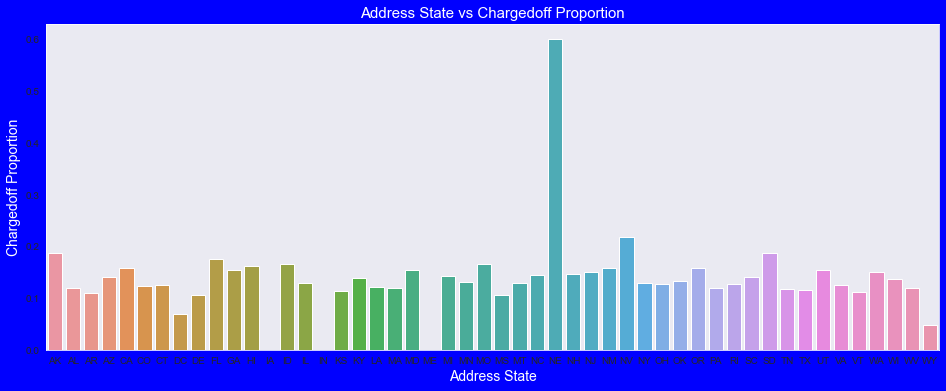

In [67]:
# Lets draw bar plots on data calculated above. Try to visualize the pattern to understand the data better.

fig, ax1 = plt.subplots(figsize=(16, 6),facecolor='b')
ax1.set_title('Address State vs Chargedoff Proportion',fontsize=15,color='w')
ax1=sns.barplot(x='addr_state', y='Chargedoff_Proportion', data=state_vs_loan)
ax1.set_xlabel('Address State',fontsize=14,color='w')
ax1.set_ylabel('Chargedoff Proportion',fontsize=14,color = 'w')
plt.show()

Observations:
1. States NE has very high chances of charged off but number of applications are too low to make any decisions.
2. NV,CA and FL states shows good number of charged offs in good number of applications.

In [68]:
# Bivariate Analysis on verification_status against Chargedoff_Proportion

verfy_vs_loan = df.groupby(['verification_status', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
verfy_vs_loan['Total'] = verfy_vs_loan['Charged Off'] + verfy_vs_loan['Current'] + verfy_vs_loan['Fully Paid'] 
verfy_vs_loan['Chargedoff_Proportion'] = verfy_vs_loan['Charged Off'] / verfy_vs_loan['Total']
verfy_vs_loan.sort_values('Chargedoff_Proportion', ascending=False)

loan_status,verification_status,Charged Off,Current,Fully Paid,Total,Chargedoff_Proportion
2,Verified,2051,603,10155,12809,0.16
1,Source Verified,1434,310,8243,9987,0.14
0,Not Verified,2142,227,14552,16921,0.13


Observations:
1. There is not much difference in charged off proportion.
2. This variable doesn't provide any insights for charged off.

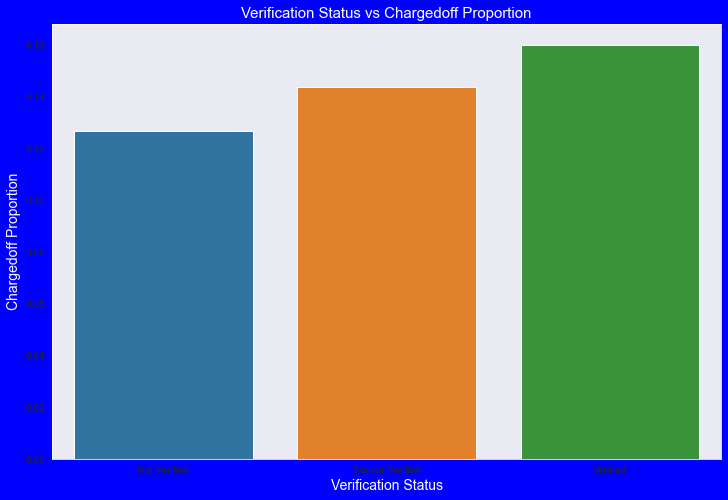

In [69]:
# Lets draw bar plots on data calculated above. Try to visualize the pattern to understand the data better.

fig, ax1 = plt.subplots(figsize=(12, 8),facecolor='b')
ax1.set_title('Verification Status vs Chargedoff Proportion',fontsize=15,color='w')
ax1=sns.barplot(x='verification_status', y='Chargedoff_Proportion', data=verfy_vs_loan)
ax1.set_xlabel('Verification Status',fontsize=14,color='w')
ax1.set_ylabel('Chargedoff Proportion',fontsize=14,color = 'w')
plt.show()

Observations:
1. There is not much difference in charged off proportion.
2. This variable doesn't provide any insights for charged off.

In [70]:
# Bivariate Analysis on pub_rec_bankruptcies against Chargedoff_Proportion

bankruptcies_vs_loan = df.groupby(['pub_rec_bankruptcies', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
bankruptcies_vs_loan['Total']=bankruptcies_vs_loan['Charged Off']+bankruptcies_vs_loan['Current']+bankruptcies_vs_loan['Fully Paid'] 
bankruptcies_vs_loan['Chargedoff_Proportion'] = bankruptcies_vs_loan['Charged Off'] / bankruptcies_vs_loan['Total']
bankruptcies_vs_loan.sort_values('Chargedoff_Proportion', ascending=False)

loan_status,pub_rec_bankruptcies,Charged Off,Current,Fully Paid,Total,Chargedoff_Proportion
2,2.00,2.00,2.00,3.00,7.00,0.29
1,1.00,366.00,37.00,1271.00,1674.00,0.22
3,Not Known,118.00,0.00,579.00,697.00,0.17
0,0.00,5141.00,1101.00,31097.00,37339.00,0.14


Observations:
1. Those who already have pub_rec_bankruptcies value 1, have charged off proportion higher than who have no pub_rec_bankruptcies.
2. pub_rec_bankruptcies count 2 has even higher charged off proportion but those numbers are not significant to decide.
3. Not known is the column for which we don't have any information abount borrower.
4. This also makes sense that who has defaulted before has more chances of dafaulting in future as well.

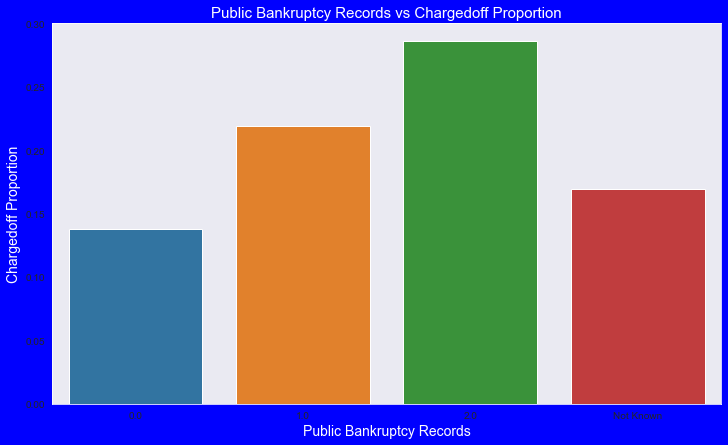

In [71]:
# Lets draw bar plots on data calculated above. Try to visualize the pattern to understand the data better.

fig, ax1 = plt.subplots(figsize=(12, 7),facecolor='b')
ax1.set_title('Public Bankruptcy Records vs Chargedoff Proportion',fontsize=15,color='w')
ax1=sns.barplot(x='pub_rec_bankruptcies', y='Chargedoff_Proportion', data=bankruptcies_vs_loan)
ax1.set_xlabel('Public Bankruptcy Records',fontsize=14,color='w')
ax1.set_ylabel('Chargedoff Proportion',fontsize=14,color = 'w')
plt.show()

Observations:
1. Those who already have pub_rec_bankruptcies value 1, have charged off proportion higher than who have no pub_rec_bankruptcies.
2. pub_rec_bankruptcies count 2 has even higher charged off proportion but those numbers are not significant to decide.
3. Not known is the column for which we don't have any information abount borrower.
4. This also makes sense that who has defaulted before has more chances of dafaulting in future as well.

In [72]:
# Bivariate Analysis on Derogatory Public Record against Chargedoff_Proportion

bankruptcies_vs_loan = df.groupby(['pub_rec', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
bankruptcies_vs_loan['Total']=bankruptcies_vs_loan['Charged Off']+bankruptcies_vs_loan['Current']+bankruptcies_vs_loan['Fully Paid'] 
bankruptcies_vs_loan['Chargedoff_Proportion'] = bankruptcies_vs_loan['Charged Off'] / bankruptcies_vs_loan['Total']
bankruptcies_vs_loan.sort_values('Chargedoff_Proportion', ascending=False)

loan_status,pub_rec,Charged Off,Current,Fully Paid,Total,Chargedoff_Proportion
1,1,457.00,43.00,1556.00,2056.00,0.22
2,2,10.00,3.00,38.00,51.00,0.20
0,0,5160.00,1094.00,31347.00,37601.00,0.14
3,3,0.00,0.00,7.00,7.00,0.00
4,4,0.00,0.00,2.00,2.00,0.00


Observations:
1. Those who already have pub_rec value 1 or 2 have charged off chances higher than who have no Derogatory Public Record.
2. pub_rec count 3-4 has less numbers so cannot reach on any conclusions.

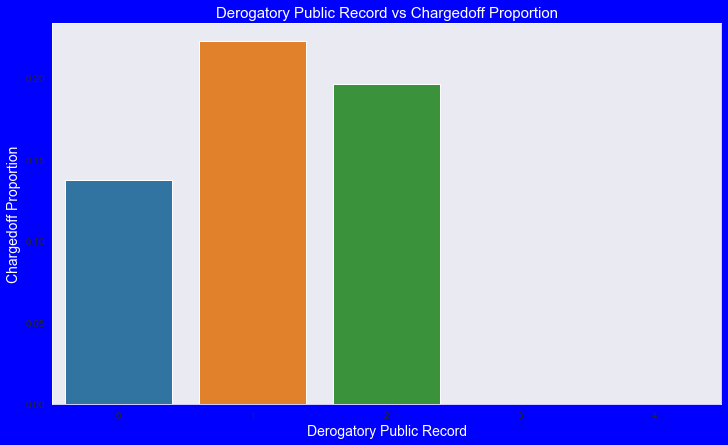

In [73]:
# Lets draw bar plots on data calculated above. Try to visualize the pattern to understand the data better.

fig, ax1 = plt.subplots(figsize=(12, 7),facecolor='b')
ax1.set_title('Derogatory Public Record vs Chargedoff Proportion',fontsize=15,color='w')
ax1=sns.barplot(x='pub_rec', y='Chargedoff_Proportion', data=bankruptcies_vs_loan)
ax1.set_xlabel('Derogatory Public Record',fontsize=14,color='w')
ax1.set_ylabel('Chargedoff Proportion',fontsize=14,color = 'w')
plt.show()

Observations:
1. Those who already have pub_rec value 1 or 2 have charged off chances higher than who have no Derogatory Public Record.
2. pub_rec count 3-4 has less numbers so cannot reach on any conclusions.

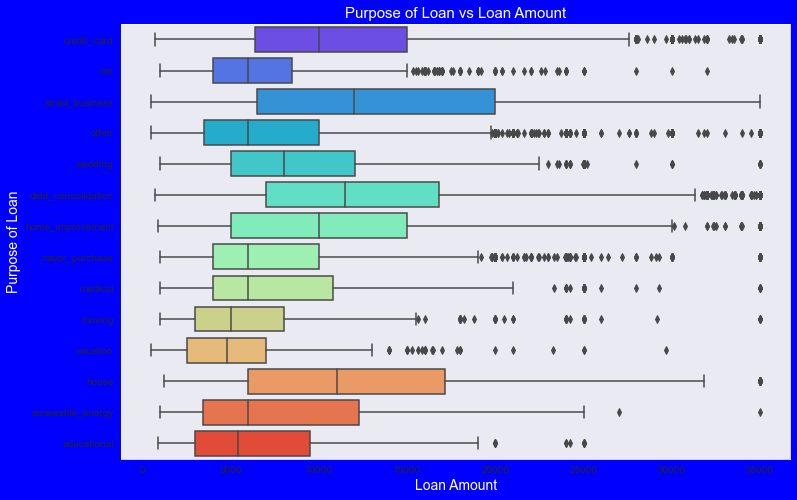

In [74]:
# Bivariate Analysis - Puprose of loan vs Loan amount
# Box Plot

plt.figure(figsize=(12,8),facecolor='b')
ax = sns.boxplot(y='purpose', x='loan_amnt', data =df,palette='rainbow')
ax.set_title('Purpose of Loan vs Loan Amount',fontsize=15,color='w')
ax.set_ylabel('Purpose of Loan',fontsize=14,color = 'w')
ax.set_xlabel('Loan Amount',fontsize=14,color = 'w')
plt.show()

Observations:
1. Median,95th percentile,75th percentile of loan amount is highest for loan taken for small business purpose among all purposes.
2. Debt consolidation is second and Credit card comes 3rd.

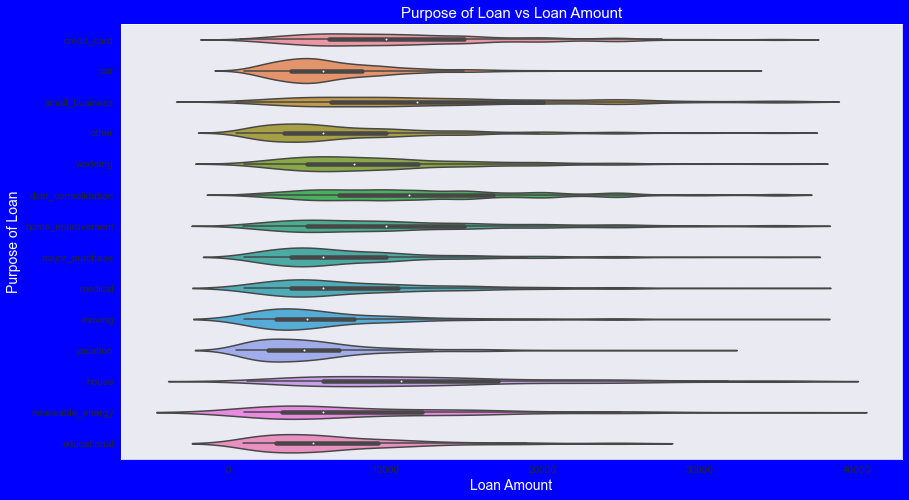

In [75]:
# Bivariate Analysis - Puprose of loan vs Loan amount 
plt.figure(figsize=(14,8),facecolor='b')
ax=sns.violinplot(y='purpose', x='loan_amnt', data =df)
ax.set_title('Purpose of Loan vs Loan Amount',fontsize=15,color='w')
ax.set_ylabel('Purpose of Loan',fontsize=14,color = 'w')
ax.set_xlabel('Loan Amount',fontsize=14,color = 'w')
plt.show()

Observations:
Loan taken for small business purpose, Debt consolidation and Credit card are somewhat evenly distributed as compare to loan taken for other purposes.

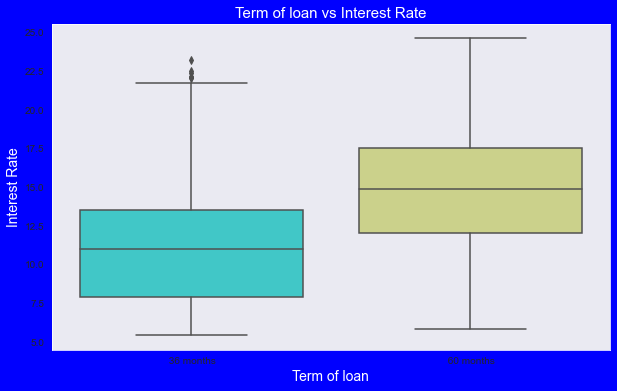

In [76]:
# Bivariate Analysis - Term of loan vs Interest Rate
# Box Plot

plt.figure(figsize=(10,6),facecolor='b')
ax = sns.boxplot(y='int_rate', x='term', data =df,palette='rainbow')
ax.set_title('Term of loan vs Interest Rate',fontsize=15,color='w')
ax.set_ylabel('Interest Rate',fontsize=14,color = 'w')
ax.set_xlabel('Term of loan',fontsize=14,color = 'w')
plt.show()

Observations:
It is clear that avearge intrest rate is higher for 60 months loan term. Most of the loans issued for longer term had higher intrest rates for repayement.

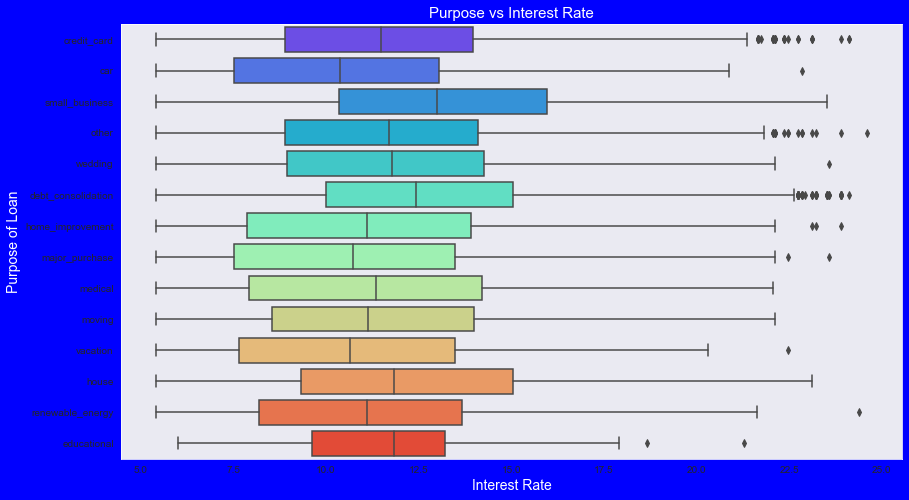

In [77]:
# Bivariate Analysis - Purpose vs Interest Rate
# Box Plot

plt.figure(figsize=(14,8),facecolor='b')
ax = sns.boxplot(x='int_rate', y='purpose', data =df,palette='rainbow')
ax.set_title('Purpose vs Interest Rate',fontsize=15,color='w')
ax.set_xlabel('Interest Rate',fontsize=14,color = 'w')
ax.set_ylabel('Purpose of Loan',fontsize=14,color = 'w')
plt.show()

Observations:
1. It is clear that avearge intrest rate is highest for small business purpose. 
2. Loans taken for small business purposes had to repay the loan with more intrest rate as compared to other.
3. Debt consolidation is 2nd where borrowers had to pay more interest rate.

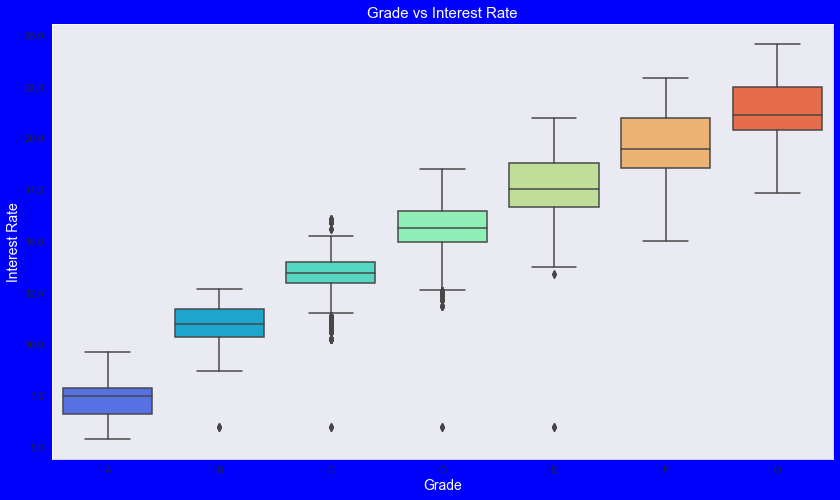

In [78]:
# Bivariate Analysis - Grade vs Interest Rate
# Box Plot

plt.figure(figsize=(14,8),facecolor='b')
ax = sns.boxplot(y='int_rate', x='grade', data =df,palette='rainbow',order = 'ABCDEFG')
ax.set_title('Grade vs Interest Rate',fontsize=15,color='w')
ax.set_ylabel('Interest Rate',fontsize=14,color = 'w')
ax.set_xlabel('Grade',fontsize=14,color = 'w')
plt.show()

Observations:
1. A-grade is a top letter grade for a lender to assign to a borrower.
2. The higher the borrower's credit grade,the lower the interest rate offered to that borrower on a loan.
3. It is clear that intrest rate is increasing with grades moving from A to F.

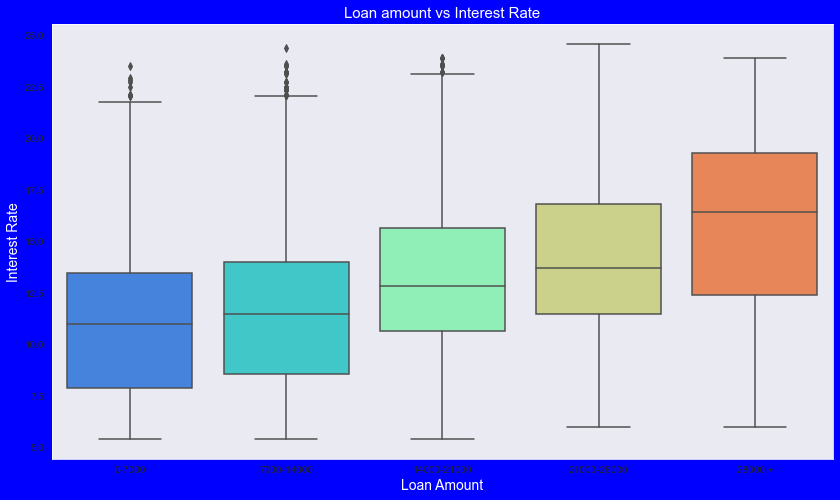

In [79]:
# Bivariate Analysis - Loan Amount vs Interest Rate
# Box Plot

plt.figure(figsize=(14,8),facecolor='b')
ax = sns.boxplot(y='int_rate', x='loan_amnt_cats', data =df,palette='rainbow')
ax.set_title('Loan amount vs Interest Rate',fontsize=15,color='w')
ax.set_ylabel('Interest Rate',fontsize=14,color = 'w')
ax.set_xlabel('Loan Amount',fontsize=14,color = 'w')
plt.show()

Observations:
It is clear that intrest rate is increasing with loan amount increase. Probably when loan amount is more it is taken for longer loan term, we saw earlier that longer the loan term more the  interest rate.

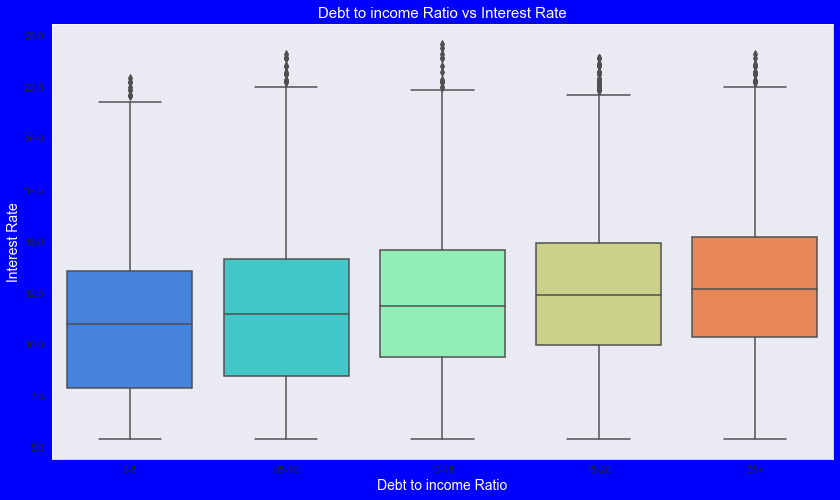

In [80]:
# Bivariate Analysis - dti vs Interest Rate
# Box Plot

plt.figure(figsize=(14,8),facecolor='b')
ax = sns.boxplot(y='int_rate', x='dti_cats', data =df,palette='rainbow')
ax.set_title('Debt to income Ratio vs Interest Rate',fontsize=15,color='w')
ax.set_ylabel('Interest Rate',fontsize=14,color = 'w')
ax.set_xlabel('Debt to income Ratio',fontsize=14,color = 'w')
plt.show()

Observations:
If your DTI is low enough you may get a lower interest rate.
Plot shows no significant variation but there is slight increase in interest rate with increase in DTI.

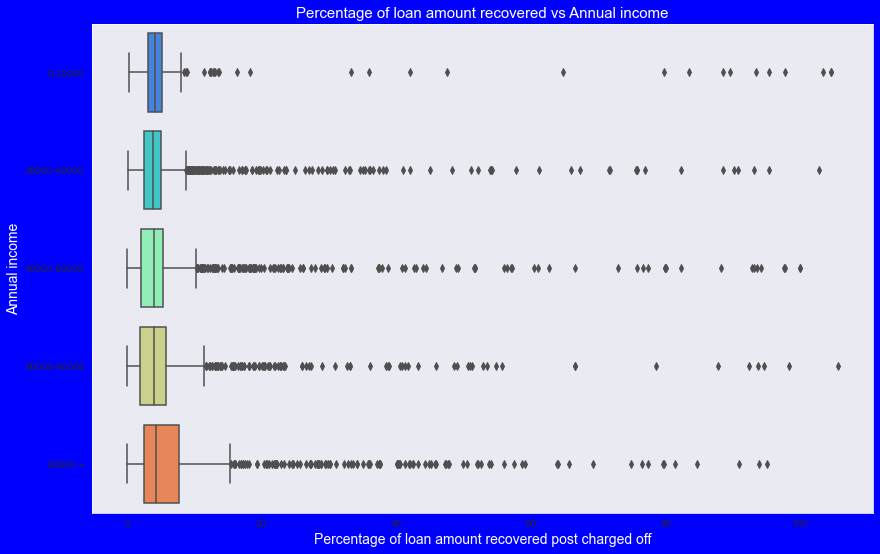

In [81]:
# Bivariate Analysis - Recoveries vs Annual income
# Box Plot
df['recoveries']=pd.to_numeric(df['recoveries'],errors='coerce')
loan_df_rec=df[df['recoveries'] > 0.00]

# calculate recovery percentage 
loan_df_rec['recovery_prcnt']=((loan_df_rec['recoveries']/loan_df_rec['loan_amnt']) * 100) 

# plot
plt.figure(figsize=(14,9),facecolor='b')
ax=sns.boxplot(x='recovery_prcnt',y='annual_inc_cats',data=loan_df_rec,palette='rainbow')
ax.set_title('Percentage of loan amount recovered vs Annual income',fontsize=15,color = 'w')
ax.set_ylabel('Annual income',fontsize=14,color = 'w')
ax.set_xlabel('Percentage of loan amount recovered post charged off',fontsize=14,color = 'w')
plt.show()

Observations:
1. Higher percentage of loan amount is recovered when annual income is high.
2. Plot shows no significant variation but there is slight increase in recovery percentage with increase in annual income.

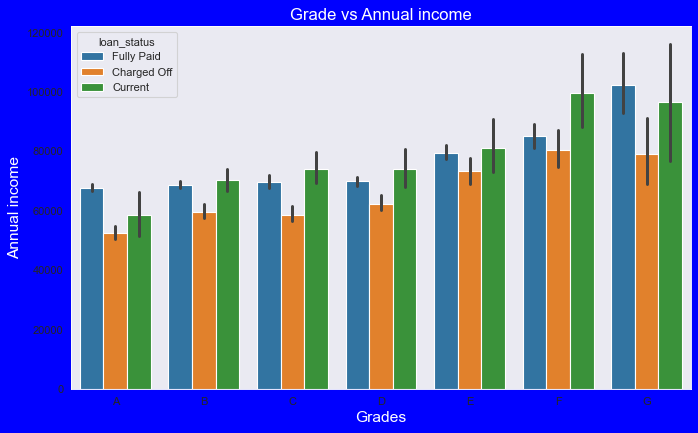

In [82]:
# Bivariate analysis
# BarPlot to show variation of annual income across grade for every loan status.

plt.figure(figsize=(10,6), dpi=80, facecolor='b', edgecolor='k')
ax=sns.barplot(x='grade', y='annual_inc', hue="loan_status", data=df, estimator=np.mean,order='ABCDEFG')
ax.set_title('Grade vs Annual income',fontsize=15,color='w')
ax.set_ylabel('Annual income',fontsize=14,color = 'w')
ax.set_xlabel('Grades',fontsize=14,color = 'w')
plt.show()

Observations:
From this we can conclude that the ones getting 'charged off' have lower annual incomes than the ones who'paid fully' for each and every grade (i.e. at same interest range)

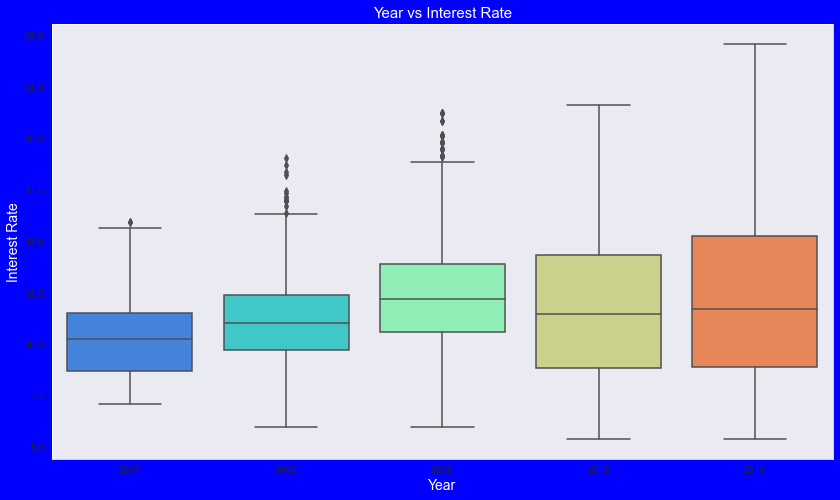

In [83]:
# Bivariate Analysis - year vs Interest Rate
# Box Plot

plt.figure(figsize=(14,8),facecolor='b')
ax = sns.boxplot(y='int_rate', x='year', data =df,palette='rainbow')
ax.set_title('Year vs Interest Rate',fontsize=15,color='w')
ax.set_ylabel('Interest Rate',fontsize=14,color = 'w')
ax.set_xlabel('Year',fontsize=14,color = 'w')
plt.show()

Observations:
Plot shows intrest rate is increasing slowly with increase in year.

<AxesSubplot:>

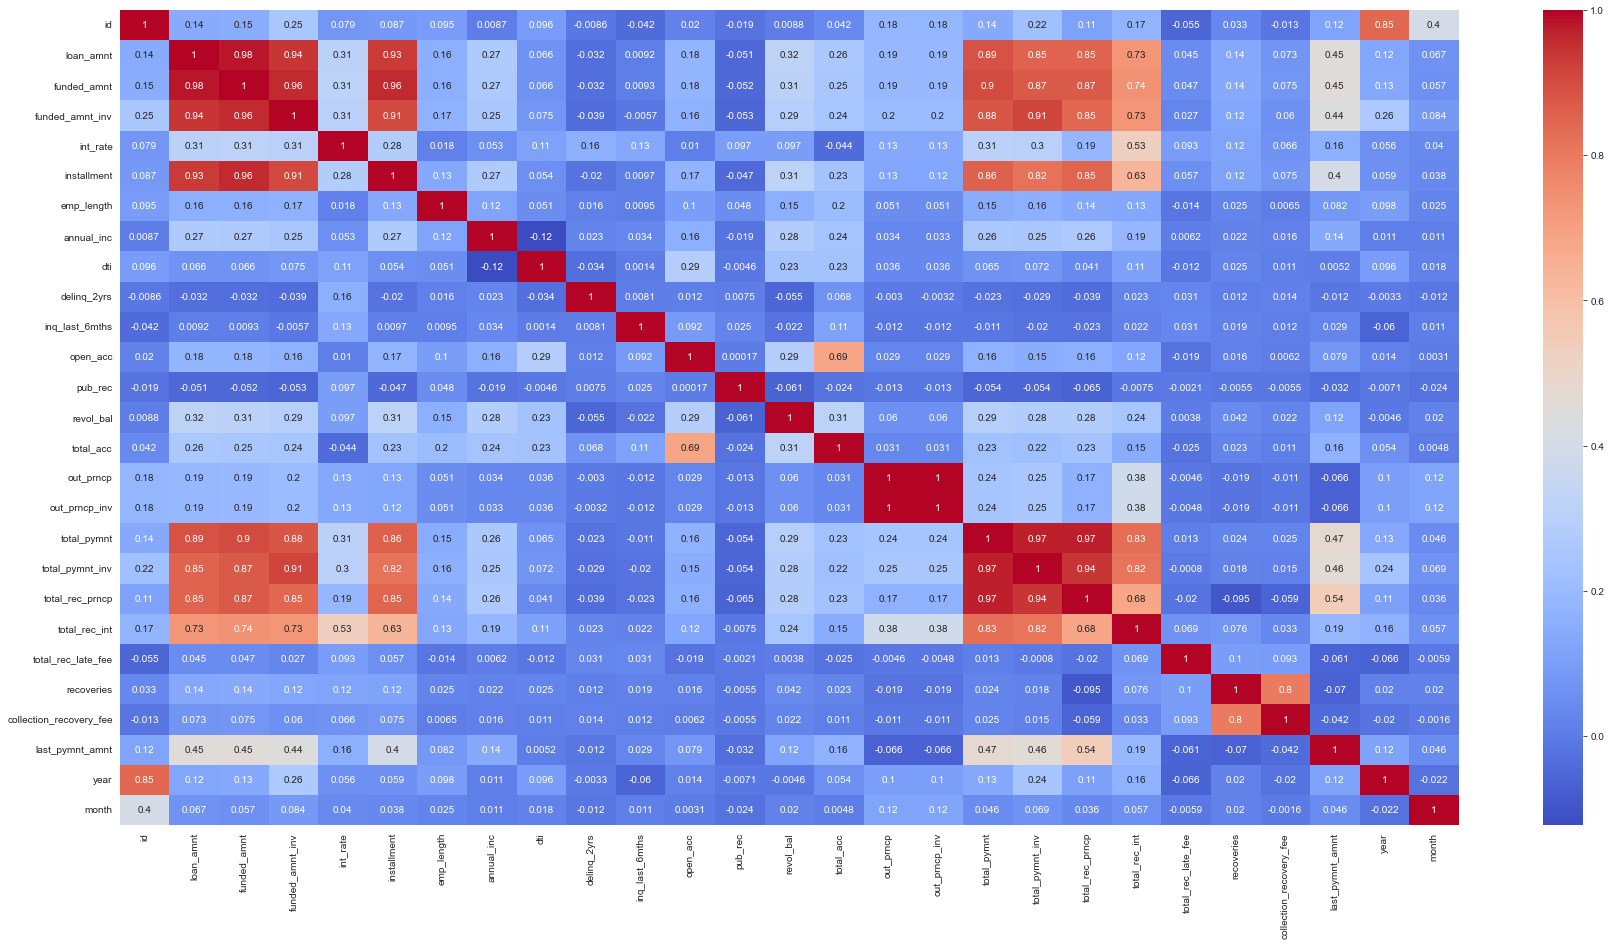

In [84]:
# Correlation Matrix-Quantitative Variables
corrMatrix=df.corr()
plt.figure(figsize=(30, 15))
sns.heatmap(corrMatrix, annot = True, cmap= 'coolwarm')

Observation:
1. Loan amount, investor amount, funding amount are strongly correlated.
2. Annual income with DTI(Debt-to-income ratio) is negatively correlated.
3. Debt income ratio is the percentage of a consumer's monthly gross income that goes toward paying debts which means when annual income is low DTI is high & vice versa.
4. Positive correlation between annual income and employment years which means income increases with work experience ;)